**Dataset lnk - https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/data**

In [ ]:
!!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/data")

Skipping, found downloaded files in "./new-plant-diseases-dataset" (use force=True to force download)


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense ,BatchNormalization ,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_dir = 'new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = 'new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir = 'new-plant-diseases-dataset/test/test'

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


# **CNN**

---



In [ ]:
cnn = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[224, 224, 3]),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=512, kernel_size=3, activation='relu'),
    GlobalAveragePooling2D(),

    Dropout(0.25),

    Flatten(),

    Dense(units=1024, activation='relu'),

    Dropout(0.5),  # To avoid overfitting

    # Output Layer
    Dense(units=38, activation='softmax')
])

cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 111, 111, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 111, 111, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 54, 54, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 54, 54, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             

 Total params: 5,280,454 (20.14 MB)

 Trainable params: 5,278,470 (20.14 MB)

 Non-trainable params: 1,984 (7.75 KB)

**Train**

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=25, callbacks=[early_stop])

Epoch 1/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 451s 189ms/step - accuracy: 0.5421 - loss: 1.6027 - val_accuracy: 0.8393 - val_loss: 0.5238
Epoch 2/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 404s 183ms/step - accuracy: 0.8847 - loss: 0.3660 - val_accuracy: 0.9136 - val_loss: 0.2752
Epoch 3/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 402s 183ms/step - accuracy: 0.9348 - loss: 0.2022 - val_accuracy: 0.9479 - val_loss: 0.1588
Epoch 4/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 388s 177ms/step - accuracy: 0.9511 - loss: 0.1461 - val_accuracy: 0.9700 - val_loss: 0.0957
Epoch 5/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 401s 182ms/step - accuracy: 0.9642 - loss: 0.1111 - val_accuracy: 0.9205 - val_loss: 0.2714
Epoch 6/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 427s 175ms/step - accuracy: 0.9708 - loss: 0.0860 - val_accuracy: 0.9580 - val_loss: 0.1373
Epoch 7/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 401s 182ms/step - accuracy: 0.9776 - loss: 0.0695 - val_accuracy: 0.9791 - val_loss: 0.0669
Epoch 8/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 388s 177ms/step - ac

In [ ]:
import json
history_dict = training_history.history
accuracy_per_epoch = {
    'accuracy': history_dict['accuracy'],
    'val_accuracy': history_dict['val_accuracy']
}

with open('cnn.json', 'w') as json_file:
    json.dump(accuracy_per_epoch, json_file, indent=4)


**Evaluate the Model**


In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)
print('Training Loss:', train_loss)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 117s 53ms/step - accuracy: 0.9951 - loss: 0.0164
Training accuracy: 0.9948218464851379
Training Loss: 0.016804253682494164


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)
print('Validation Loss:', val_loss)

550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - accuracy: 0.9878 - loss: 0.0406
Validation accuracy: 0.9882199168205261
Validation Loss: 0.0369829498231411


In [ ]:
cnn.save('cnn.keras',include_optimizer='true')

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


**Plotting**

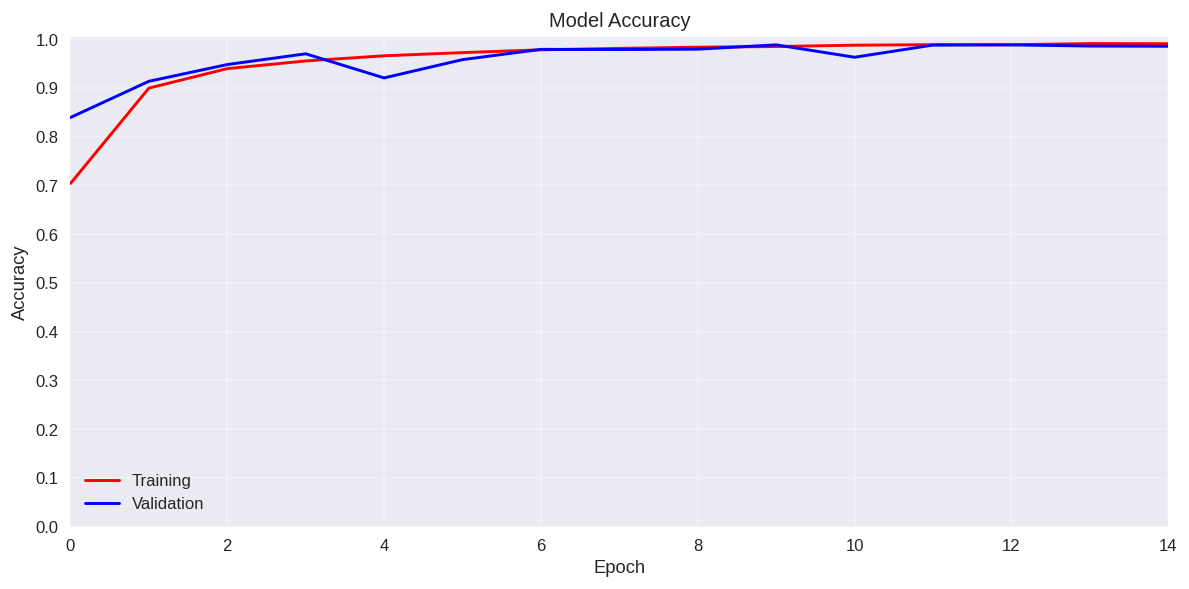

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure
plt.figure(figsize=(10, 5), dpi=120)
plt.style.use('seaborn-v0_8')

# Plot accuracy
plt.plot(training_history.history['accuracy'], label='Training', color='red')
plt.plot(training_history.history['val_accuracy'], label='Validation',color='blue')

# Labels and title
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Ticks and limits
plt.xticks(np.arange(0, 26, 2))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim(0, 14)
plt.grid(True, alpha=0.3)

# Legend
plt.legend()

# Save and show
plt.tight_layout()
plt.savefig('accuracy_epochs.png', dpi=300)
plt.show()


In [ ]:
class_names = validation_set.class_names
class_name_dict = {i: name for i, name in enumerate(class_names)}

print(class_name_dict)
indices = [str(i) for i in range(len(class_names))]



{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test set
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels from test_set
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Convert to numpy
Y_true = Y_true.numpy()
predicted_categories = predicted_categories.numpy()

# Confusion matrix and classification report
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 71s 4ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      1.00      1.00       504
                                 Apple___Black_rot       0.99      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.99       440
                                   Apple___healthy       1.00      0.99      1.00       502
                               Blueberry___healthy       1.00      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.99      0.97       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Nor

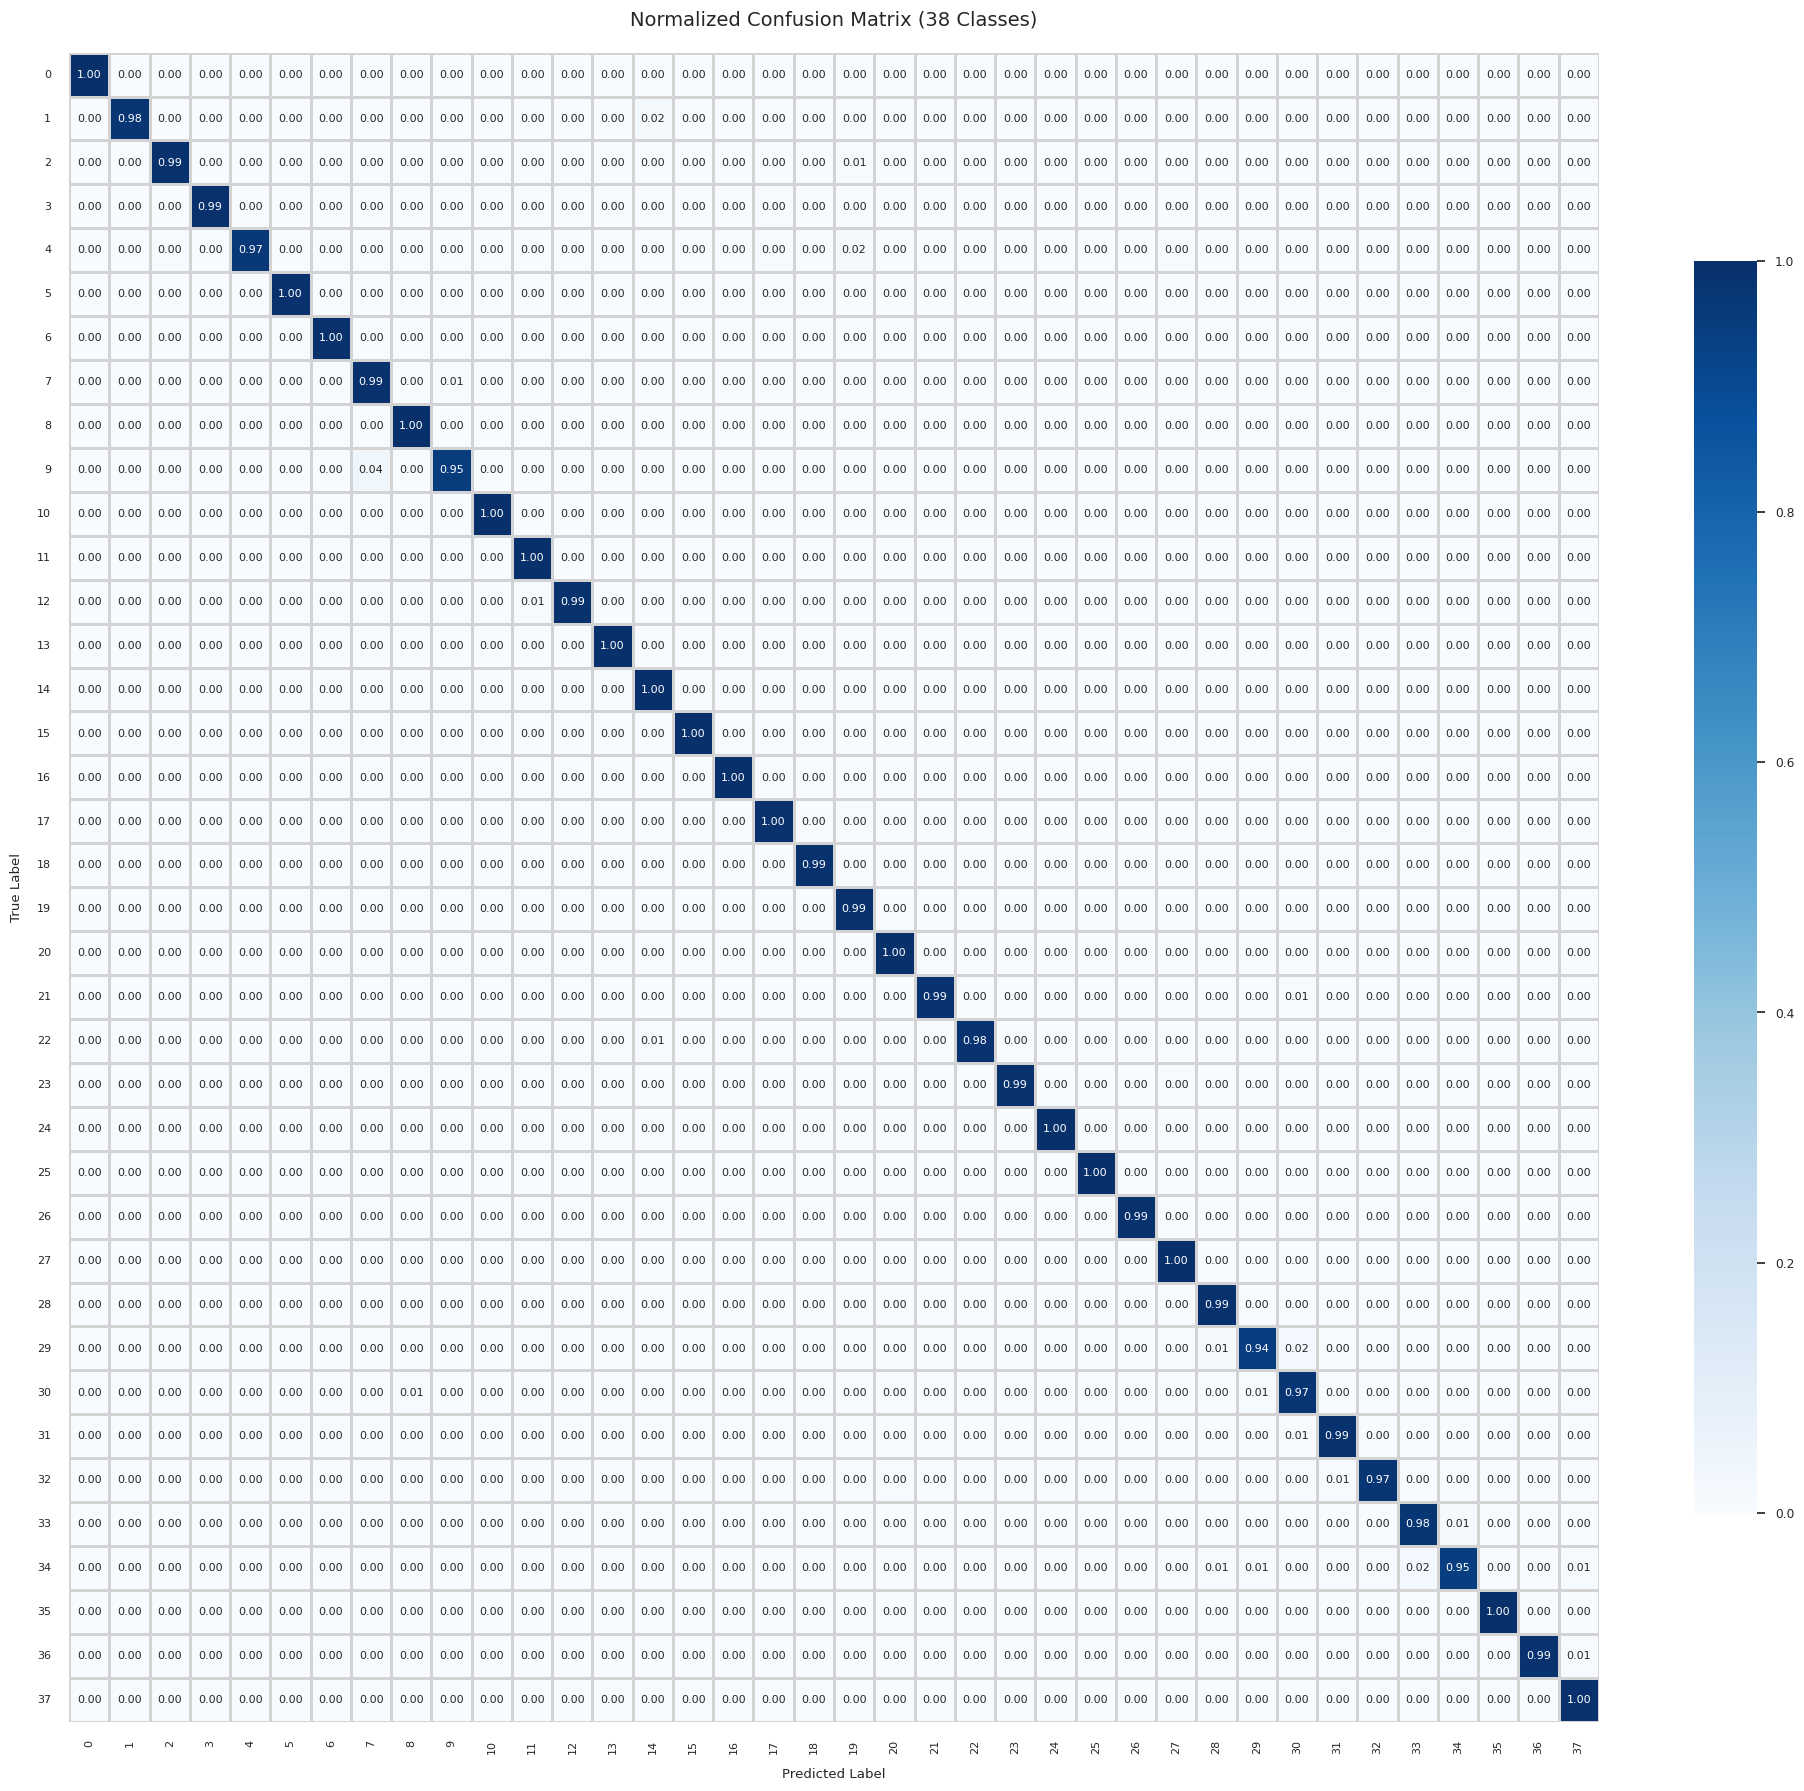

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 18))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (38 Classes)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix_38_classes.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
from google.colab import files
import os

# List of files to download
required_files = [
    'cnn.keras',
    'cnn.json',
    'accuracy_epochs.png',
    'confusion_matrix_38_classes.png'
]

# Initialize lists to track downloaded and missing files
downloaded_files = []
missing_files = []

for file in required_files:
    if os.path.exists(file):
        files.download(file)
        downloaded_files.append(file)
    else:
        missing_files.append(file)


if missing_files:
    print("Error: The following files were not found and could not be downloaded:")
    for mf in missing_files:
        print(f"- {mf}")
else:
    print("All required files were found and queued for download.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All required files were found and queued for download.


In [ ]:
image_path = '/content/new-plant-diseases-dataset/test/test/PotatoHealthy2.JPG'

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch

# Make predictions
predictions = cnn.predict(input_arr)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)
print(f"predicted Index - {predicted_class_index}")

# Get the predicted class name
predicted_class_name = class_name_dict[predicted_class_index]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step
predicted Index - 22


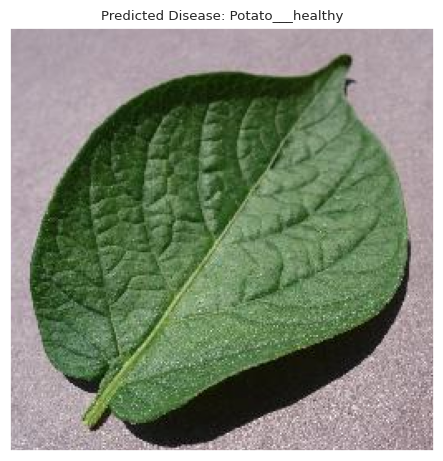

In [ ]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Predicted Disease: {predicted_class_name}")
plt.xticks([])
plt.yticks([])
plt.show()